In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.impute import SimpleImputer
from scipy import stats

%matplotlib inline
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv('Desktop/Turing College/4. Python for Data Analytics/Sprint 4. Machine Learning/melbourne.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,"3,067.00",...,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
1,Abbotsford,85 Turner St,2,h,"1,480,000.00",S,Biggin,3/12/2016,2.50,"3,067.00",...,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
2,Abbotsford,25 Bloomburg St,2,h,"1,035,000.00",S,Biggin,4/02/2016,2.50,"3,067.00",...,1.00,0.00,156.00,79.00,"1,900.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00"
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,"3,067.00",...,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,"4,019.00"
4,Abbotsford,5 Charles St,3,h,"1,465,000.00",SP,Biggin,4/03/2017,2.50,"3,067.00",...,2.00,0.00,134.00,150.00,"1,900.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
df_clean = df.copy()

df_clean.dropna(subset=['Price', 'CouncilArea', 'Regionname'], inplace=True)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27244 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27244 non-null  object 
 1   Address        27244 non-null  object 
 2   Rooms          27244 non-null  int64  
 3   Type           27244 non-null  object 
 4   Price          27244 non-null  float64
 5   Method         27244 non-null  object 
 6   SellerG        27244 non-null  object 
 7   Date           27244 non-null  object 
 8   Distance       27244 non-null  float64
 9   Postcode       27244 non-null  float64
 10  Bedroom2       20806 non-null  float64
 11  Bathroom       20800 non-null  float64
 12  Car            20423 non-null  float64
 13  Landsize       17982 non-null  float64
 14  BuildingArea   10656 non-null  float64
 15  YearBuilt      12084 non-null  float64
 16  CouncilArea    27244 non-null  object 
 17  Lattitude      20993 non-null  float64
 18  Longtitude 

In [5]:
df_clean.drop(['Postcode', 'Address', 'Method', 'SellerG'], axis=1, inplace=True)
df_clean.head()

,Suburb,Rooms,Type,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,2,h,"1,480,000.00",3/12/2016,2.50,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
2,Abbotsford,2,h,"1,035,000.00",4/02/2016,2.50,2.00,1.00,0.00,156.00,79.00,"1,900.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00"
4,Abbotsford,3,h,"1,465,000.00",4/03/2017,2.50,3.00,2.00,0.00,134.00,150.00,"1,900.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00"
5,Abbotsford,3,h,"850,000.00",4/03/2017,2.50,3.00,2.00,1.00,94.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
6,Abbotsford,4,h,"1,600,000.00",4/06/2016,2.50,3.00,1.00,2.00,120.00,142.00,"2,014.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00"


In [6]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'], dayfirst=True)
df_clean['DateNumeric'] = (df_clean['Date'] - pd.Timestamp("1970-01-01")).dt.days
df_clean.head()

,Suburb,Rooms,Type,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,DateNumeric
1,Abbotsford,2,h,"1,480,000.00",2016-12-03,2.50,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00",17138
2,Abbotsford,2,h,"1,035,000.00",2016-02-04,2.50,2.00,1.00,0.00,156.00,79.00,"1,900.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00",16835
4,Abbotsford,3,h,"1,465,000.00",2017-03-04,2.50,3.00,2.00,0.00,134.00,150.00,"1,900.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00",17229
5,Abbotsford,3,h,"850,000.00",2017-03-04,2.50,3.00,2.00,1.00,94.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00",17229
6,Abbotsford,4,h,"1,600,000.00",2016-06-04,2.50,3.00,1.00,2.00,120.00,142.00,"2,014.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00",16956


In [7]:
# Separate numeric columns
numeric_columns = df_clean.select_dtypes(include=['number']).columns

# Impute missing values in numeric columns
my_imputer = SimpleImputer(strategy='mean')
df_clean[numeric_columns] = my_imputer.fit_transform(df_clean[numeric_columns])

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27244 entries, 1 to 34856
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27244 non-null  object        
 1   Rooms          27244 non-null  float64       
 2   Type           27244 non-null  object        
 3   Price          27244 non-null  float64       
 4   Date           27244 non-null  datetime64[ns]
 5   Distance       27244 non-null  float64       
 6   Bedroom2       27244 non-null  float64       
 7   Bathroom       27244 non-null  float64       
 8   Car            27244 non-null  float64       
 9   Landsize       27244 non-null  float64       
 10  BuildingArea   27244 non-null  float64       
 11  YearBuilt      27244 non-null  float64       
 12  CouncilArea    27244 non-null  object        
 13  Lattitude      27244 non-null  float64       
 14  Longtitude     27244 non-null  float64       
 15  Regionname     27244 non

In [8]:
df_clean['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [9]:
df_clean['Type'].unique()

array(['h', 't', 'u'], dtype=object)

In [10]:
df_clean['CouncilArea'].nunique()

33

In [11]:
df_clean['Suburb'].nunique()

344

In [12]:
# Create the 'Metropolitan' column: 1 if 'Metropolitan' is in the value, 0 otherwise
df_clean['Metropolitan'] = df_clean['Regionname'].str.contains('Metropolitan').astype(int)

df_clean.head()

,Suburb,Rooms,Type,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,DateNumeric,Metropolitan
1,Abbotsford,2.00,h,"1,480,000.00",2016-12-03,2.50,2.00,1.00,1.00,202.00,156.83,"1,966.61",Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00","17,138.00",1
2,Abbotsford,2.00,h,"1,035,000.00",2016-02-04,2.50,2.00,1.00,0.00,156.00,79.00,"1,900.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00","16,835.00",1
4,Abbotsford,3.00,h,"1,465,000.00",2017-03-04,2.50,3.00,2.00,0.00,134.00,150.00,"1,900.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00","17,229.00",1
5,Abbotsford,3.00,h,"850,000.00",2017-03-04,2.50,3.00,2.00,1.00,94.00,156.83,"1,966.61",Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00","17,229.00",1
6,Abbotsford,4.00,h,"1,600,000.00",2016-06-04,2.50,3.00,1.00,2.00,120.00,142.00,"2,014.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00","16,956.00",1


In [13]:
# Create the 'House' column: 1 if 'Type' is 'h', 0 otherwise
df_clean['House'] = ((df_clean['Type'] == 'h') | (df_clean['Type'] == 't')).astype(int)

df_clean.head()

,Suburb,Rooms,Type,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,DateNumeric,Metropolitan,House
1,Abbotsford,2.00,h,"1,480,000.00",2016-12-03,2.50,2.00,1.00,1.00,202.00,156.83,"1,966.61",Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00","17,138.00",1,1
2,Abbotsford,2.00,h,"1,035,000.00",2016-02-04,2.50,2.00,1.00,0.00,156.00,79.00,"1,900.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00","16,835.00",1,1
4,Abbotsford,3.00,h,"1,465,000.00",2017-03-04,2.50,3.00,2.00,0.00,134.00,150.00,"1,900.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00","17,229.00",1,1
5,Abbotsford,3.00,h,"850,000.00",2017-03-04,2.50,3.00,2.00,1.00,94.00,156.83,"1,966.61",Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00","17,229.00",1,1
6,Abbotsford,4.00,h,"1,600,000.00",2016-06-04,2.50,3.00,1.00,2.00,120.00,142.00,"2,014.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00","16,956.00",1,1


In [14]:
council_freq = df_clean['CouncilArea'].value_counts(normalize=True)
df_clean['CouncilArea_freq'] = df_clean['CouncilArea'].map(council_freq)

suburb_freq = df_clean['Suburb'].value_counts(normalize=True)
df_clean['Suburb_freq'] = df_clean['Suburb'].map(suburb_freq)

df_clean.head()

,Suburb,Rooms,Type,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,DateNumeric,Metropolitan,House,CouncilArea_freq,Suburb_freq
1,Abbotsford,2.00,h,"1,480,000.00",2016-12-03,2.50,2.00,1.00,1.00,202.00,...,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00","17,138.00",1,1,0.03,0.00
2,Abbotsford,2.00,h,"1,035,000.00",2016-02-04,2.50,2.00,1.00,0.00,156.00,...,Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00","16,835.00",1,1,0.03,0.00
4,Abbotsford,3.00,h,"1,465,000.00",2017-03-04,2.50,3.00,2.00,0.00,134.00,...,Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00","17,229.00",1,1,0.03,0.00
5,Abbotsford,3.00,h,"850,000.00",2017-03-04,2.50,3.00,2.00,1.00,94.00,...,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00","17,229.00",1,1,0.03,0.00
6,Abbotsford,4.00,h,"1,600,000.00",2016-06-04,2.50,3.00,1.00,2.00,120.00,...,Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00","16,956.00",1,1,0.03,0.00


In [15]:
df_numeric = df_clean.select_dtypes(include=['number'])

df_numeric.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,DateNumeric,Metropolitan,House,CouncilArea_freq,Suburb_freq
1,2.00,"1,480,000.00",2.50,2.00,1.00,1.00,202.00,156.83,"1,966.61",-37.80,145.00,"4,019.00","17,138.00",1,1,0.03,0.00
2,2.00,"1,035,000.00",2.50,2.00,1.00,0.00,156.00,79.00,"1,900.00",-37.81,144.99,"4,019.00","16,835.00",1,1,0.03,0.00
4,3.00,"1,465,000.00",2.50,3.00,2.00,0.00,134.00,150.00,"1,900.00",-37.81,144.99,"4,019.00","17,229.00",1,1,0.03,0.00
5,3.00,"850,000.00",2.50,3.00,2.00,1.00,94.00,156.83,"1,966.61",-37.80,145.00,"4,019.00","17,229.00",1,1,0.03,0.00
6,4.00,"1,600,000.00",2.50,3.00,1.00,2.00,120.00,142.00,"2,014.00",-37.81,144.99,"4,019.00","16,956.00",1,1,0.03,0.00


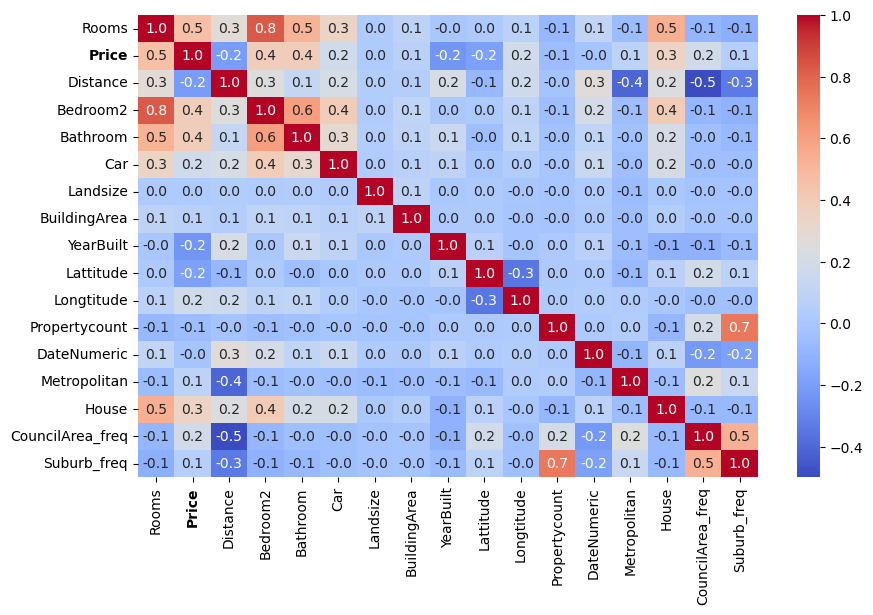

In [16]:
# Compute the correlation matrix
corr = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f')

# Customise the 'Price' label in bold
x_labels = plt.gca().get_xticklabels()
y_labels = plt.gca().get_yticklabels()

# Make only 'Price' bold
for label in x_labels:
    if label.get_text() == 'Price':
        label.set_fontweight('bold')

for label in y_labels:
    if label.get_text() == 'Price':
        label.set_fontweight('bold')

plt.show()

In [17]:
scaler = MinMaxScaler()

# Fit and transform the numeric DataFrame
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

In [63]:
y = df_numeric_scaled['Price']  # Target variable
x = df_numeric_scaled[['Rooms', 'Bathroom', 'Distance', 'Car', 'YearBuilt', 'Landsize', 'BuildingArea', 'Propertycount', 'DateNumeric', 'House']]  # Feature variables

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate residuals
residuals = y_test - y_pred

# Number of observations in the test set
n = len(y_test)

# Number of predictors
p = x_test.shape[1]

# Calculate the Mean Squared Error
mse = np.sum(residuals**2) / (n - p - 1)

# Calculate the variance-covariance matrix
x_test_with_const = np.column_stack([np.ones(len(x_test)), x_test])
var_cov_matrix = mse * np.linalg.inv(x_test_with_const.T @ x_test_with_const)

# Calculate standard errors
standard_errors = np.sqrt(np.diag(var_cov_matrix))

# Calculate t-values
t_values = np.concatenate([[intercept], coefficients]) / standard_errors

# Calculate p-values
p_values = [2 * (1 - stats.t.cdf(np.abs(t_val), df=n - p - 1)) for t_val in t_values]

# Create a summary table
summary_table = pd.DataFrame({
    'coefficient': np.concatenate([[intercept], coefficients]),
    'std_error': standard_errors,
    't_value': t_values,
    'p_value': p_values
}, index=['Intercept'] + x.columns.tolist())

summary_table['p_value'] = summary_table['p_value'].apply(lambda x: f"{x:.3f}")
summary_table

,coefficient,std_error,t_value,p_value
Intercept,0.33,0.02,16.42,0.000
Rooms,0.30,0.01,22.37,0.000
Bathroom,0.19,0.01,17.24,0.000
Distance,-0.14,0.00,-30.88,0.000
Car,0.06,0.01,4.36,0.000
YearBuilt,-0.33,0.02,-15.23,0.000
Landsize,0.16,0.12,1.40,0.162
BuildingArea,0.19,0.19,0.99,0.322
Propertycount,-0.00,0.00,-1.46,0.145
DateNumeric,0.00,0.00,0.96,0.337


In [64]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

mse = metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

r2 = metrics.r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 0.0296
Mean Squared Error (MSE): 0.0019
Root Mean Squared Error (RMSE): 0.0435
R-squared (R²): 0.4326


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif

,Variable,VIF
0,Rooms,10.67
1,Bathroom,11.36
2,Distance,4.51
3,Car,5.93
4,YearBuilt,18.46
5,Landsize,1.05
6,BuildingArea,1.34
7,Propertycount,3.80
8,DateNumeric,7.24
9,House,6.59
